In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

*customerID- Customer ID
* gender- Whether the customer is a male or a female
* SeniorCitizen- Whether the customer is a senior citizen or not (1, 0)
* Partner- Whether the customer has a partner or not (Yes, No)
* Dependents- Whether the customer has dependents or not (Yes, No)
* tenure- Number of months the customer has stayed with the company
* PhoneService- Whether the customer has a phone service or not (Yes, No)
* MultipleLines- Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService- Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity- Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup- Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection- Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport- Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV- Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies- Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract- The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling- Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod- The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges- The amount charged to the customer monthly
* TotalCharges- The total amount charged to the customer
* Churn- Whether the customer churned or not (Yes or No)

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import plotly.offline as py
from plotly.offline import iplot
import plotly.io as pio
import scikitplot as skplt

In [105]:
df= pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [106]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
df.shape

(7043, 21)

In [108]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**we need to convert TotalCharges from object to numeric**

In [109]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [110]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [111]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [112]:
df.dropna(inplace=True)

In [113]:
df.duplicated().sum()

0

In [114]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [115]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')
print(f'Numerical Columns: {num_cols.columns.tolist()}')
print(f'Categorical Columns: {cat_cols.columns.tolist()}\n')
print('\n\nUnique Values In Categorical columns:')
[f'{col}:   {cat_cols[col].unique()}' for col in cat_cols]

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



Unique Values In Categorical columns:


["customerID:   ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'\n '3186-AJIEK']",
 "gender:   ['Female' 'Male']",
 "Partner:   ['Yes' 'No']",
 "Dependents:   ['No' 'Yes']",
 "PhoneService:   ['No' 'Yes']",
 "MultipleLines:   ['No phone service' 'No' 'Yes']",
 "InternetService:   ['DSL' 'Fiber optic' 'No']",
 "OnlineSecurity:   ['No' 'Yes' 'No internet service']",
 "OnlineBackup:   ['Yes' 'No' 'No internet service']",
 "DeviceProtection:   ['No' 'Yes' 'No internet service']",
 "TechSupport:   ['No' 'Yes' 'No internet service']",
 "StreamingTV:   ['No' 'Yes' 'No internet service']",
 "StreamingMovies:   ['No' 'Yes' 'No internet service']",
 "Contract:   ['Month-to-month' 'One year' 'Two year']",
 "PaperlessBilling:   ['Yes' 'No']",
 "PaymentMethod:   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'\n 'Credit card (automatic)']",
 "Churn:   ['No' 'Yes']"]

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
customerID  :  [5365 3953 2558 ... 3358 5923 2221]  =  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mail

We creating a deep copy of the orginal dataset and label encoding the text data.
Modifications in the original dataset will not be highlighted in this deep copy.
Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.


In [117]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


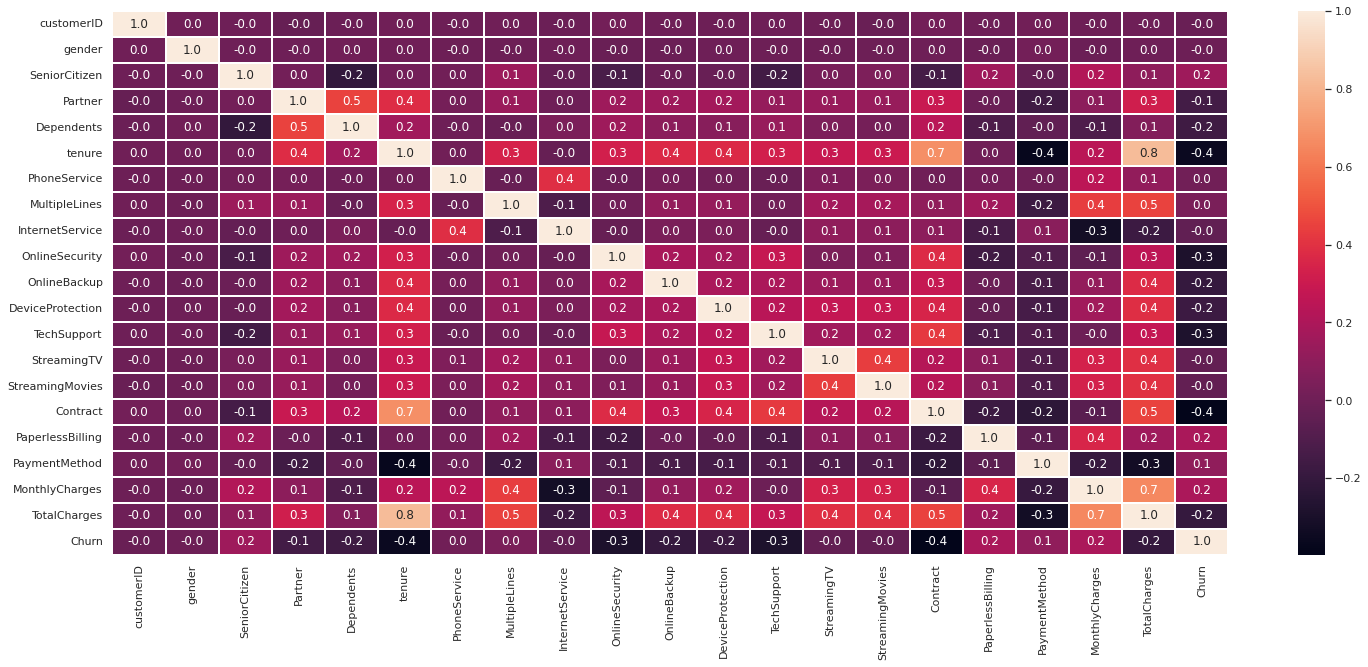

In [118]:
plt.figure(figsize=(25,10))
sns.heatmap(df1.corr(), cmap='rocket', annot=True, fmt='.1f', linewidths=.1)
plt.show()

**positev corr with SeniorCitizen and PaperlessBilling and MonthlyCharges and PaymentMethod
negative corr with tenure ,contract ,OnlineSecurity ,techsuport, Dependents , Onlinebacckup, DeviceProtection and partner**

In [119]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : customerID tenure MonthlyCharges TotalCharges


In [120]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

In [121]:
colors = ['#ff9f9b','#2D2926']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

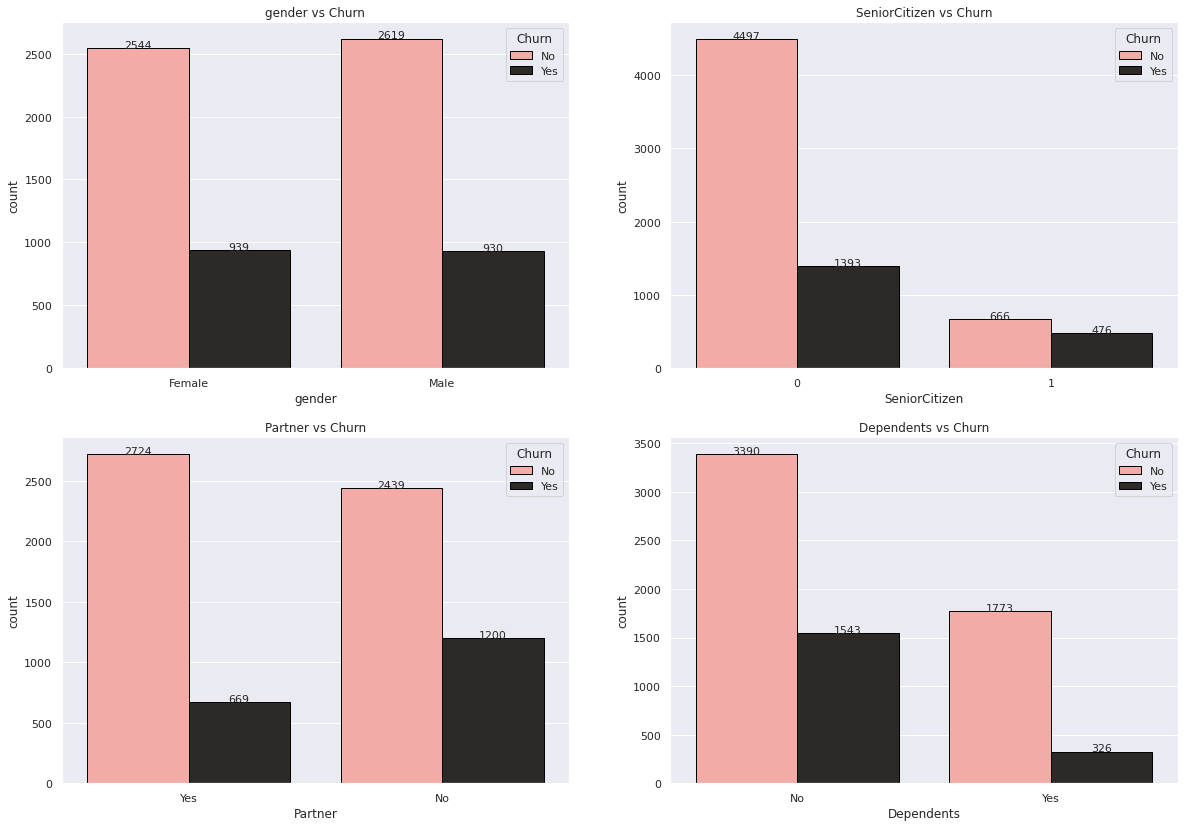

In [122]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(l1[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

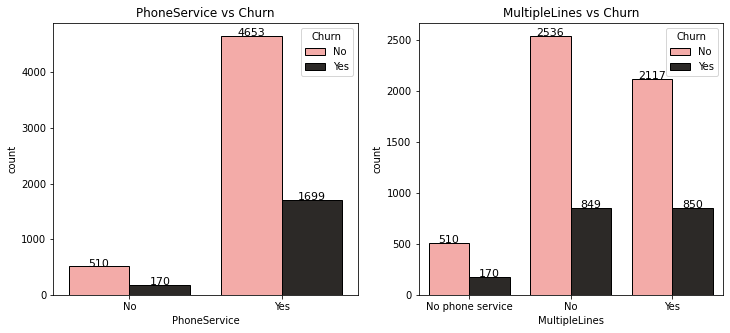

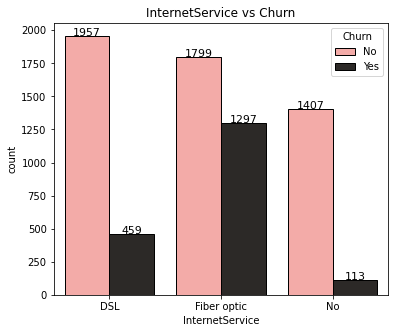

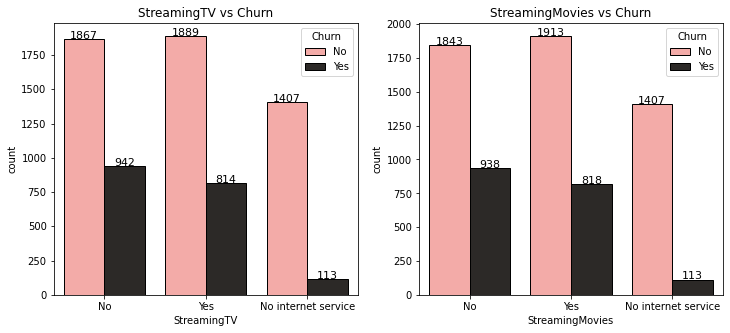

In [22]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)  
    ax = sns.countplot(l2[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(l2[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i + 3],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

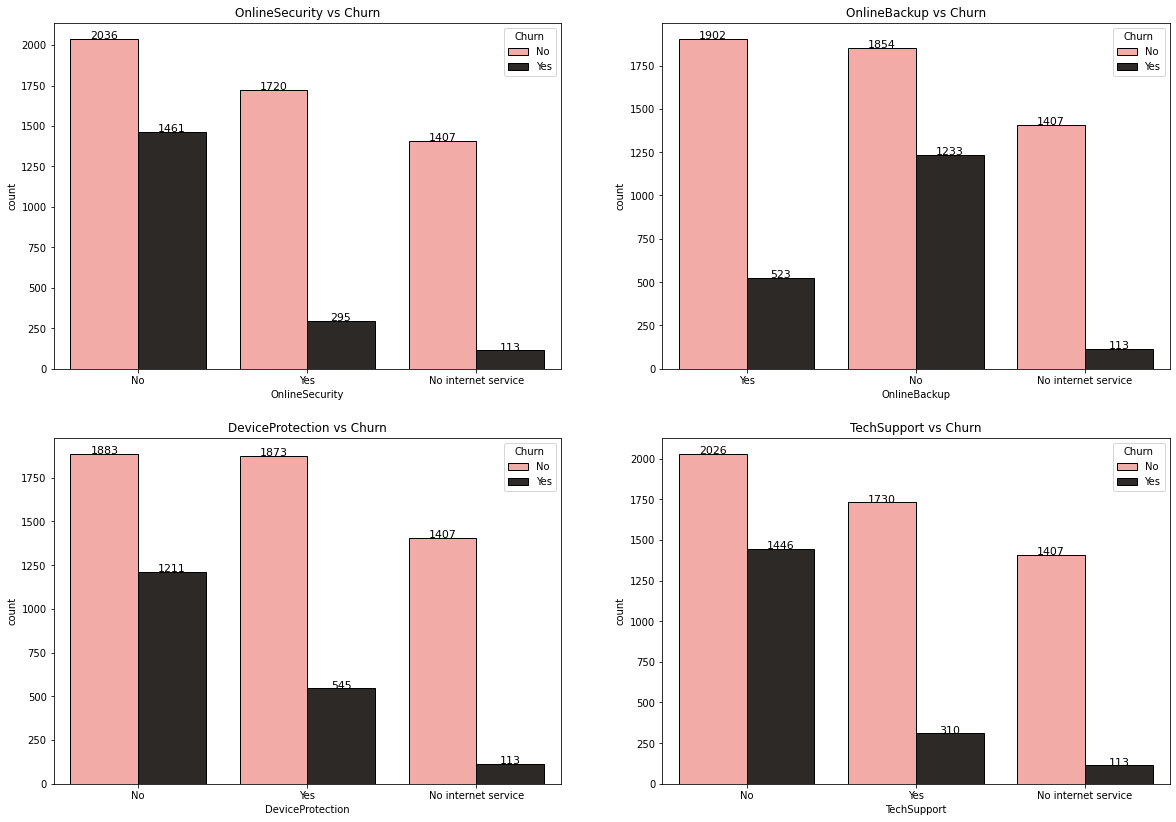

In [23]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(l2[-4 + i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



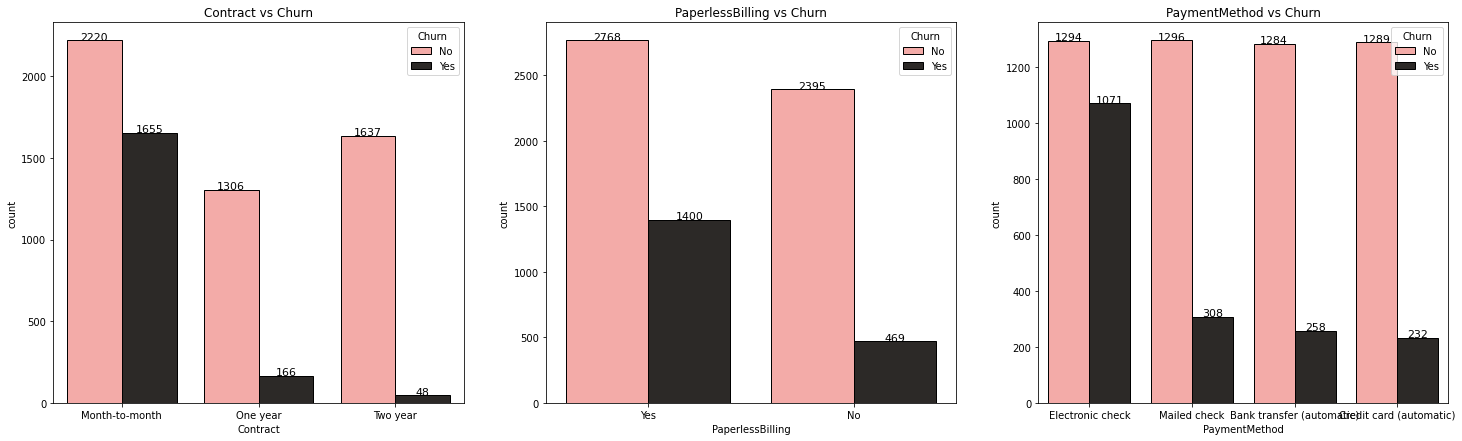

In [24]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(l3[0],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(l3[1],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(l3[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

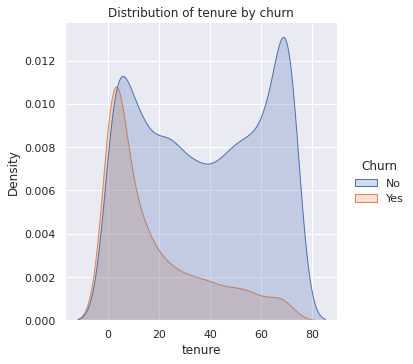

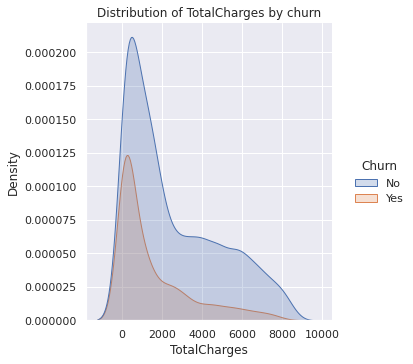

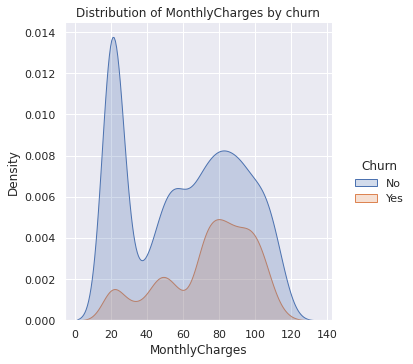

In [123]:
sns.displot(df, x="tenure", hue="Churn", kind="kde", fill=True) .set(title='Distribution of tenure by churn')
sns.displot(df, x="TotalCharges", hue="Churn", kind="kde", fill=True) .set(title='Distribution of TotalCharges by churn')
sns.displot(df, x="MonthlyCharges", hue="Churn", kind="kde", fill=True) .set(title='Distribution of MonthlyCharges by churn')

In [23]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:xlabel='tenure'>

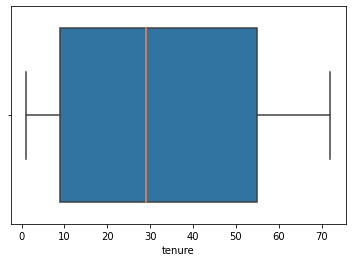

In [16]:
sns.boxplot(x=df["tenure"]
           , medianprops={"color": "coral"}
           )

In [ ]:
sns.boxplot(x=df["TotalCharges"]
           , medianprops={"color": "coral"}
           )

In [ ]:
sns.boxplot(x=df["MonthlyCharges"]
           , medianprops={"color": "coral"}
           )

In [ ]:
print("Customer Churn Rate(%):")
print(round(df['Churn'].value_counts(normalize=True) * 100,2))

In [ ]:
pd.crosstab(df.SeniorCitizen,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('SeniorCitizen vs Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
pd.crosstab(df.Partner,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('Partner vs Churn')
plt.xlabel('Partner')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
pd.crosstab(df.Dependents,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('Dependents vs Churn')
plt.xlabel('Dependentsr')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
pd.crosstab(df.PaperlessBilling,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('PaperlessBilling vs Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [ ]:
pd.crosstab(df.Contract,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [ ]:
pd.crosstab(df.OnlineSecurity,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('OnlineSecurity vs Churn')
plt.xlabel('OnlineSecurity')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [ ]:
pd.crosstab(df.TechSupport,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('TechSupport vs Churn')
plt.xlabel('TechSupport')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [ ]:
pd.crosstab(df.OnlineBackup,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('OnlineBackup vs Churn')
plt.xlabel('OnlineBackup')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [ ]:
pd.crosstab(df.DeviceProtection,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['darkorange','steelblue'])
plt.title('DeviceProtection vs Churn')
plt.xlabel('DeviceProtection')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [ ]:
sns.displot(df, x="MonthlyCharges", hue="Churn", kind="kde", fill=True) .set(title='Distribution of MonthlyCharges by churn')

In [ ]:
sns.displot(df, x="TotalCharges", hue="Churn", kind="kde", fill=True) .set(title='Distribution of TotalCharges by churn')

In [ ]:
sns.displot(df, x="tenure", hue="Churn", kind="kde", fill=True) .set(title='Distribution of tenure by churn')

In [ ]:
pd.crosstab(df.MonthlyCharges,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('MonthlyCharges vs Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x='tenure', kde=True, ax=axs[0, 0], color='steelblue')
sns.histplot(data=df, x='MonthlyCharges', kde=True, ax=axs[0, 1], color='steelblue')
sns.histplot(data=df, x='TotalCharges', kde=True, ax=axs[1, 0], color='steelblue');

In [124]:
# Square Root Transformation

df.tenure = np.sqrt(df.tenure)
df.MonthlyCharges = np.sqrt(df.MonthlyCharges)
df.TotalCharges = np.sqrt(df.TotalCharges)

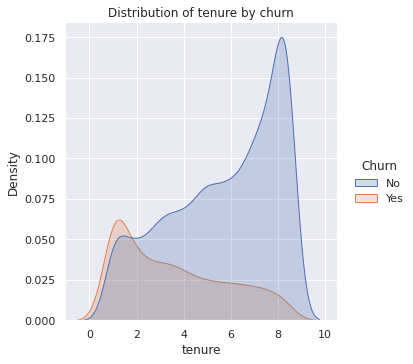

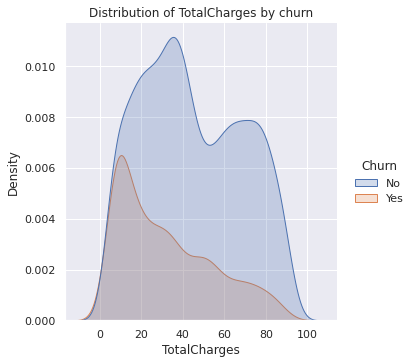

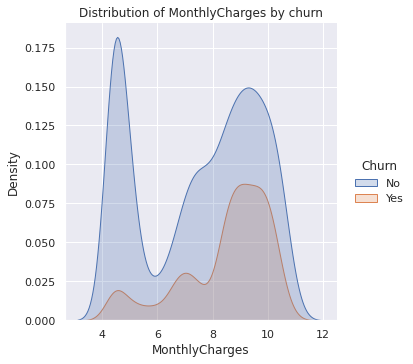

In [125]:
sns.displot(df, x="tenure", hue="Churn", kind="kde", fill=True) .set(title='Distribution of tenure by churn')
sns.displot(df, x="TotalCharges", hue="Churn", kind="kde", fill=True) .set(title='Distribution of TotalCharges by churn')
sns.displot(df, x="MonthlyCharges", hue="Churn", kind="kde", fill=True) .set(title='Distribution of MonthlyCharges by churn')

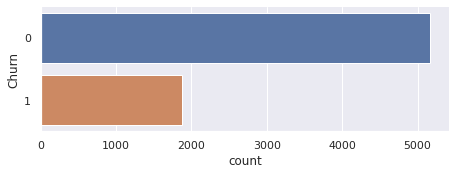

In [34]:
ax = sns.catplot(y="Churn", kind="count", data=df1, height=2.6, aspect=2.5, orient='h')

In [35]:
X = df1.drop(["Churn"], axis=1)
y = df1["Churn"]

In [36]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

In [37]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

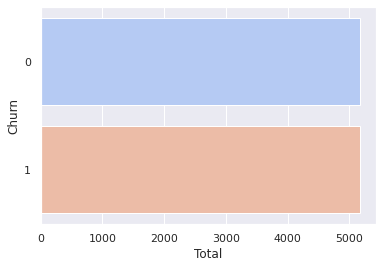

In [38]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df1, palette="coolwarm")
plt.ylabel('Churn')
plt.xlabel('Total')
plt.show()

In [39]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier                       # XGBoost
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import ShuffleSplit, GridSearchCV

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
X_train.shape

(8260, 20)

In [42]:
X_test.shape

(2066, 20)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=7)

KNN.fit(X_train, y_train)

KNNy_pred = KNN.predict(X_test)
KNNAcc = accuracy_score(y_test, KNNy_pred)

print('KNN accuracy: {:.2f}%'.format(KNNAcc*100))

KNN accuracy: 70.91%


[[644 362]
 [239 821]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

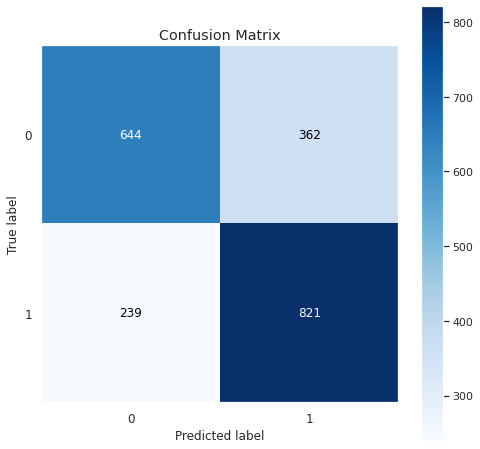

In [74]:
print(confusion_matrix(y_test, KNNy_pred))
skplt.metrics.plot_confusion_matrix(y_test, KNNy_pred,figsize=(8,8))

AUC: 0.707


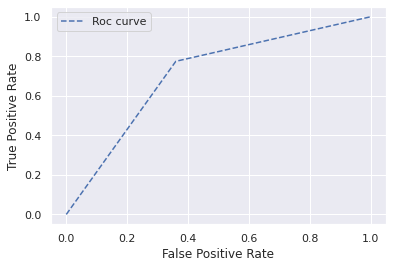

In [75]:
#ROC Implementation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test,KNNy_pred)
auc = roc_auc_score(y_test,KNNy_pred)
print('AUC: %.3f' % auc)
pyplot.plot(fpr, tpr, linestyle='--', label='Roc curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [76]:
print(classification_report(y_test, KNNy_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1006
           1       0.69      0.77      0.73      1060

    accuracy                           0.71      2066
   macro avg       0.71      0.71      0.71      2066
weighted avg       0.71      0.71      0.71      2066



In [77]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

DTy_pred = DT.predict(X_test)

DTAcc = accuracy_score(y_test, DTy_pred)

print('DT accuracy: {:.2f}%'.format(DTAcc*100))

DT accuracy: 79.28%


[[791 215]
 [210 850]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

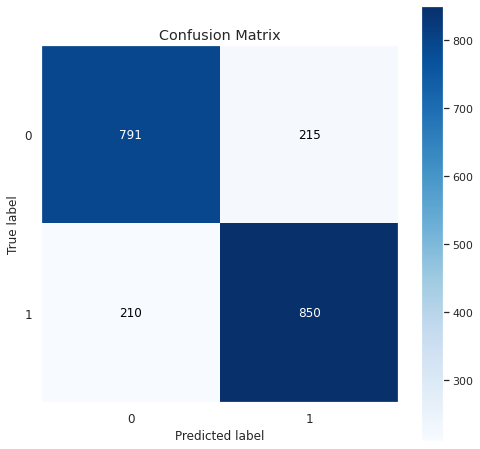

In [72]:
print(confusion_matrix(y_test, DTy_pred))
skplt.metrics.plot_confusion_matrix(y_test, DTy_pred,figsize=(8,8))

AUC: 0.793


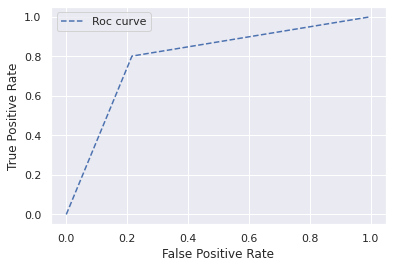

In [78]:
#ROC Implementation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test,DTy_pred)
auc = roc_auc_score(y_test,DTy_pred)
print('AUC: %.3f' % auc)
pyplot.plot(fpr, tpr, linestyle='--', label='Roc curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [79]:
print(classification_report(y_test, DTy_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1006
           1       0.80      0.80      0.80      1060

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [80]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)

RFCy_pred = RFC.predict(X_test)
RFCAcc = accuracy_score(y_test, RFCy_pred)

print('RFC accuracy: {:.2f}%'.format(RFCAcc*100))

RFC accuracy: 86.35%


In [81]:
print(classification_report(y_test, RFCy_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1006
           1       0.87      0.87      0.87      1060

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



[[863 143]
 [139 921]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

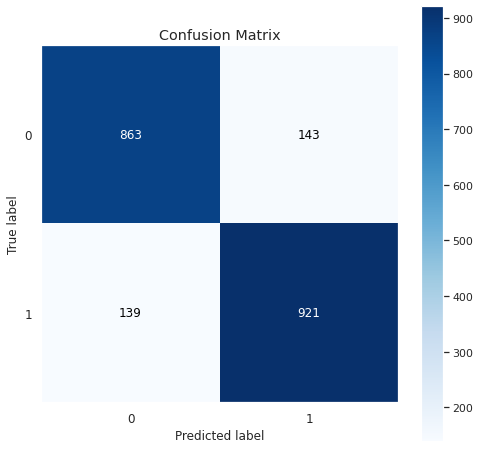

In [82]:
print(confusion_matrix(y_test, RFCy_pred))
skplt.metrics.plot_confusion_matrix(y_test, RFCy_pred,figsize=(8,8))

AUC: 0.863


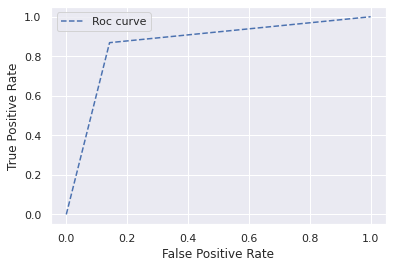

In [83]:
#ROC Implementation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test,RFCy_pred)
auc = roc_auc_score(y_test,RFCy_pred)
print('AUC: %.3f' % auc)
pyplot.plot(fpr, tpr, linestyle='--', label='Roc curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [84]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(X_train, y_train)

LRy_pred = LR.predict(X_test)
LRAcc = accuracy_score(y_test, LRy_pred)

print('LR accuracy: {:.2f}%'.format(LRAcc*100))

LR accuracy: 82.24%


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [85]:
print(classification_report(y_test, LRy_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1006
           1       0.80      0.87      0.83      1060

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



[[779 227]
 [140 920]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

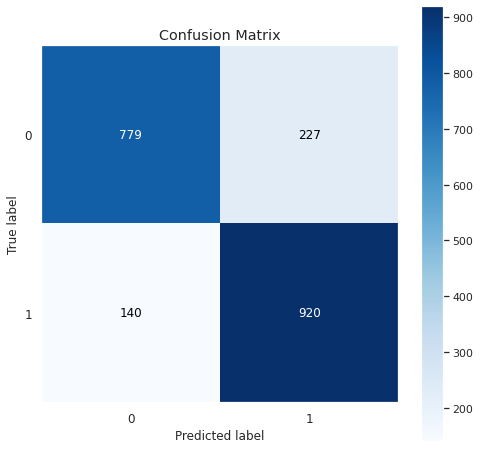

In [86]:
print(confusion_matrix(y_test, LRy_pred))
skplt.metrics.plot_confusion_matrix(y_test, LRy_pred,figsize=(8,8))

AUC: 0.821


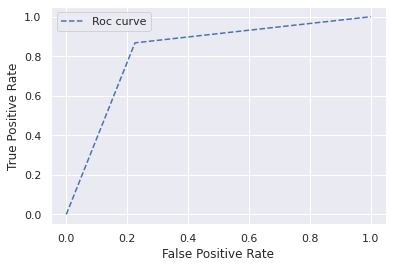

In [126]:
#ROC Implementation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test,LRy_pred)
auc = roc_auc_score(y_test,LRy_pred)
print('AUC: %.3f' % auc)
pyplot.plot(fpr, tpr, linestyle='--', label='Roc curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [88]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors','RandomForestClassifier',' DecisionTreeClassifier' ], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, RFCAcc*100, DTAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,RandomForestClassifier,86.350436
0,Logistic Regression,82.236205
3,DecisionTreeClassifier,79.283640
1,K Neighbors,70.909971


In [89]:
identity = df1["customerID"]
dataset = df1.drop(columns="customerID")

In [91]:
test_identity = X_test['customerID']

In [103]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = RFCy_pred
final_results["propensity_to_churn(%)"] = RFCy_pred
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results )

       customerID  Churn  predictions  propensity_to_churn(%) Ranking
6917         3759      0            0                       0      10
7023          437      1            0                       0      10
2730         5456      0            0                       0      10
2030         5749      0            0                       0      10
3959         6291      0            0                       0      10
...           ...    ...          ...                     ...     ...
3197         3901      0            1                     100       1
8841         3840      1            1                     100       1
10232        2655      1            1                     100       1
1884         5724      0            0                       0       6
5797         5567      1            0                       0       6

[2066 rows x 5 columns]
